# Exploration des mots

## Preprocessing

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [172]:
words_meta_filename = "../data/ascii/words.txt"
BASE_IMG_PATH = '../data/words'
columns= ['word_id', 'seg_res', 'gray_level', 'x', 'y', 'w', 'h', 'tag', 'transcription']

def parse_my_file(filename):
    with open(filename) as f:
        for line in f:
            if line.startswith('#'):
                continue
            yield line.strip().split(' ',len(columns) - 1)

df = pd.DataFrame(parse_my_file(words_meta_filename), columns=columns)
df.head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  object
 2   gray_level     115320 non-null  object
 3   x              115320 non-null  object
 4   y              115320 non-null  object
 5   w              115320 non-null  object
 6   h              115320 non-null  object
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
dtypes: object(9)
memory usage: 7.9+ MB


In [174]:
df['seg_res'].value_counts()

ok     96456
err    18864
Name: seg_res, dtype: int64

In [175]:

df['x'] = df['x'].astype(int)
df['y'] = df['y'].astype(int)
df['w'] = df['w'].astype(int)
df['h'] = df['h'].astype(int)
df['seg_res'].replace(['ok', 'err'], [1, 0], inplace=True) 
df['gray_level'] = df['gray_level'].astype(int)


In [176]:
df['seg_res'].value_counts()

1    96456
0    18864
Name: seg_res, dtype: int64

In [177]:
def get_word_image_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    return BASE_IMG_PATH + '/' + path_parts[0] + '/' + "-".join(path_parts[0:2]) + '/' + word_id+ '.png'

def get_form_img_path_by_word_id(word_id):
    path_parts = word_id.split('-')
    first_letter = path_parts[0][0].lower()
    if first_letter in ['a', 'b', 'c', 'd']:
        base_path = "../data/formsA-D/" 
    elif first_letter in ['e', 'f', 'g', 'h']:
        base_path = "../data/formsE-H/" 
    else:
        base_path = "../data/formsI-Z/" 
    return base_path + "-".join(path_parts[0:2]) + '.png'

In [178]:
df['word_img_path'] = df['word_id'].apply(lambda x: get_word_image_path_by_word_id(x))
df['form_img_path'] = df['word_id'].apply(lambda x: get_form_img_path_by_word_id(x))

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115320 entries, 0 to 115319
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   word_id        115320 non-null  object
 1   seg_res        115320 non-null  int64 
 2   gray_level     115320 non-null  int64 
 3   x              115320 non-null  int64 
 4   y              115320 non-null  int64 
 5   w              115320 non-null  int64 
 6   h              115320 non-null  int64 
 7   tag            115320 non-null  object
 8   transcription  115320 non-null  object
 9   word_img_path  115320 non-null  object
 10  form_img_path  115320 non-null  object
dtypes: int64(6), object(5)
memory usage: 9.7+ MB


In [180]:
df.head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription,word_img_path,form_img_path
0,a01-000u-00-00,1,154,408,768,27,51,AT,A,../data/words/a01/a01-000u/a01-000u-00-00.png,../data/formsA-D/a01-000u.png
1,a01-000u-00-01,1,154,507,766,213,48,NN,MOVE,../data/words/a01/a01-000u/a01-000u-00-01.png,../data/formsA-D/a01-000u.png
2,a01-000u-00-02,1,154,796,764,70,50,TO,to,../data/words/a01/a01-000u/a01-000u-00-02.png,../data/formsA-D/a01-000u.png
3,a01-000u-00-03,1,154,919,757,166,78,VB,stop,../data/words/a01/a01-000u/a01-000u-00-03.png,../data/formsA-D/a01-000u.png
4,a01-000u-00-04,1,154,1185,754,126,61,NPT,Mr.,../data/words/a01/a01-000u/a01-000u-00-04.png,../data/formsA-D/a01-000u.png


## Rendering

In [181]:

def show_img(path):
    img = plt.imread(path)
    plt.figure(figsize = (20,10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)


def show_word_image_by_line(line):
    show_img(line.word_img_path)


def show_form_img_by_word_id(line):
    show_img(line.form_img_path)

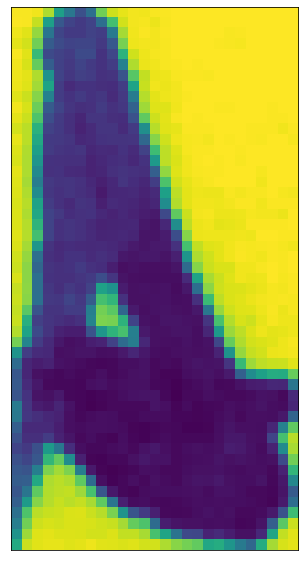

In [182]:
show_word_image_by_line(df.iloc[0])

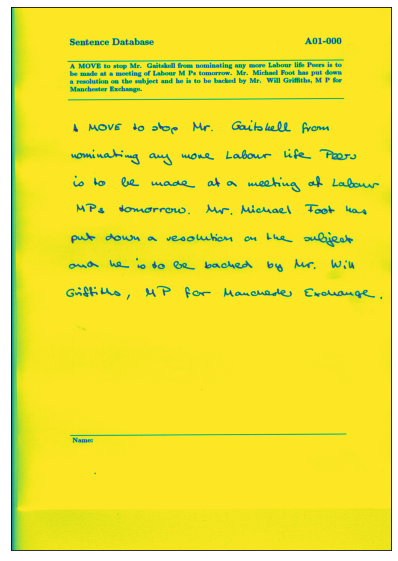

In [183]:
show_form_img_by_word_id(df.iloc[0])

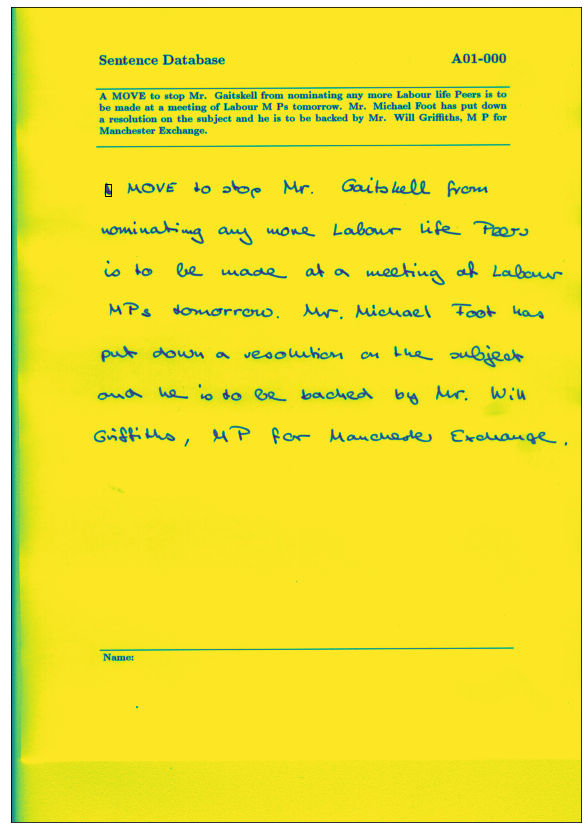

In [184]:
def plot_bounding_box(line):
    img = plt.imread(line.form_img_path)

    fig, ax = plt.subplots(figsize=(20,15))
    fig.figsize=(20,10)
    ax.imshow(img)

    ax.add_patch(
        patches.Rectangle(
            (line.x, line.y),
            line.w,
            line.h,
            fill=False      
        ) ) 
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_bounding_box(df.iloc[0])

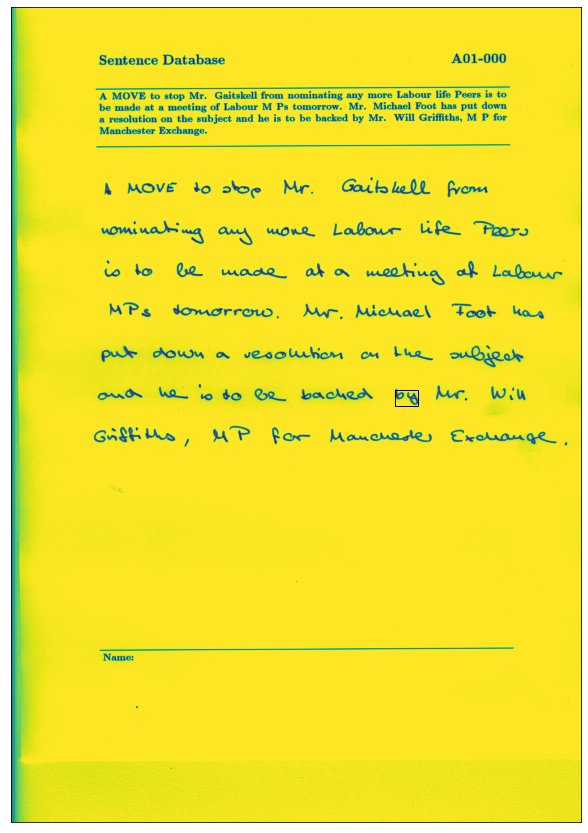

In [185]:
plot_bounding_box(df.iloc[42])

## Niveau de gris et contraste

### Niveau de gris

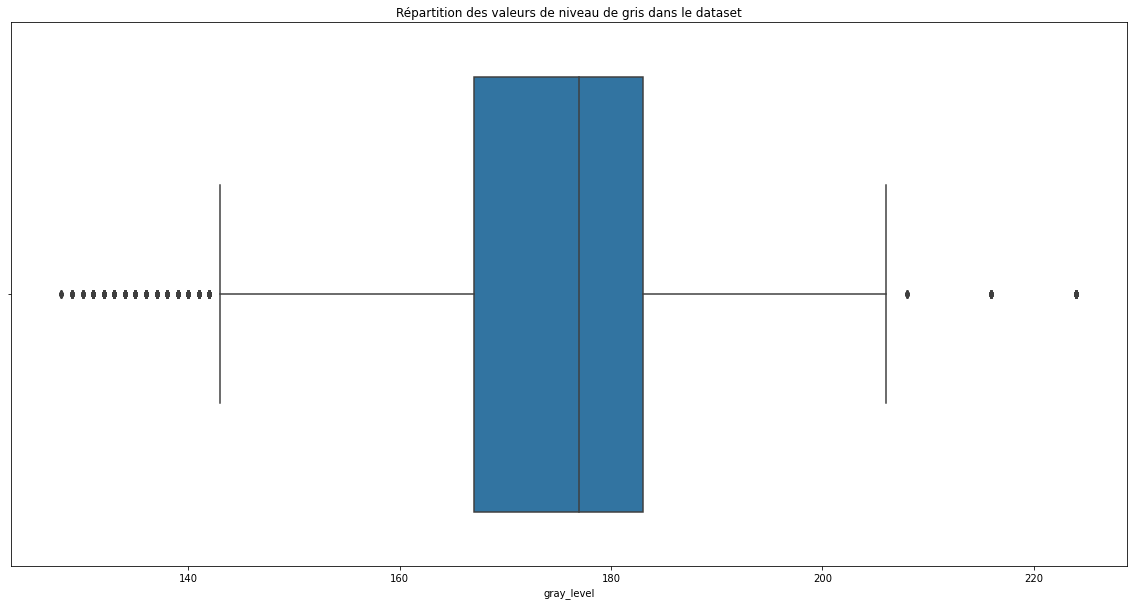

In [186]:
df['gray_level'].describe()
plt.figure(figsize=(20,10))
plt.title('Répartition des valeurs de niveau de gris dans le dataset')
sns.boxplot(x='gray_level', data=df);

Nous remarquons une concentration des niveaux de gris autour de la médiane (177) avec une déviation moyenne standard légère (seulement 13.8). 

Nous pouvons ainsi nous poser la question suivante: comment réagira notre modèle en présence de valeurs extrêmes très légers aux couleurs claires et traits épaix aux couleurs sombres.

In [187]:
min_gray_level = df['gray_level'].min()
max_gray_level = df['gray_level'].max()

low_gray_level_line_index = df[df['gray_level'] == min_gray_level].index.tolist()[0]
high_gray_level_line_index = df[df['gray_level'] == max_gray_level].index.tolist()[0]

low_gray_form_img_path =  df.iloc[low_gray_level_line_index].form_img_path
low_gray_letter_img_path = df.iloc[low_gray_level_line_index].word_img_path

high_gray_form_img_path = df.iloc[high_gray_level_line_index].form_img_path
high_gray_letter_img_path = df.iloc[high_gray_level_line_index].word_img_path

low_gray_form_img = plt.imread(low_gray_form_img_path)
low_gray_letter_img = plt.imread(low_gray_letter_img_path)

high_gray_form_img = plt.imread(high_gray_form_img_path)
high_gray_letter_img = plt.imread(high_gray_letter_img_path)

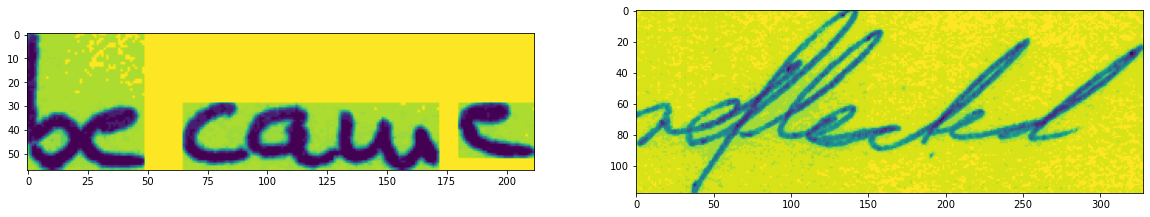

In [188]:
fig,ax = plt.subplots(1, 2, figsize = (20,10))

ax = ax.ravel()
ax[0].imshow(low_gray_letter_img)
ax[1].imshow(high_gray_letter_img)
plt.show()

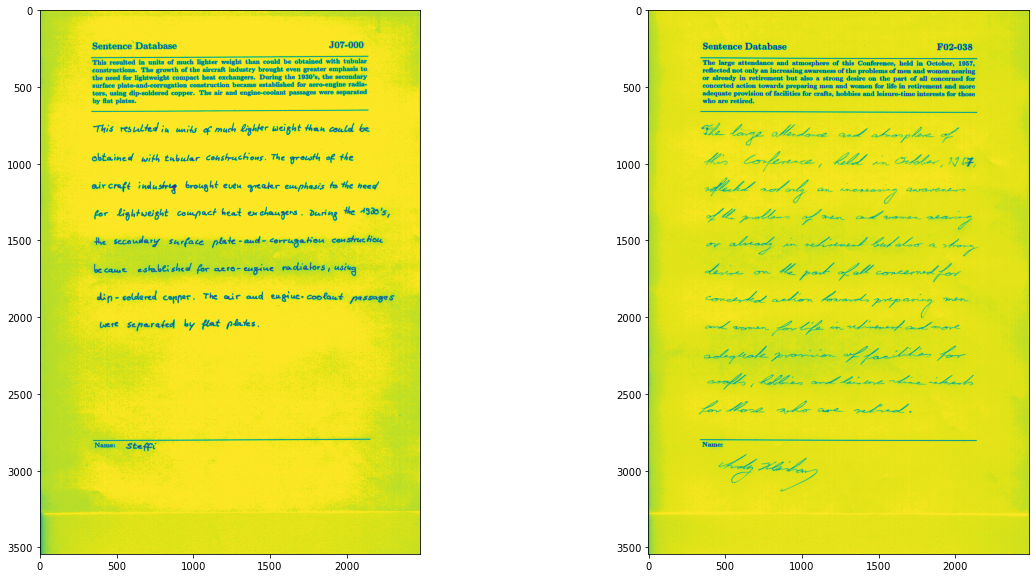

In [189]:
fig,ax = plt.subplots(1, 2, figsize = (20,10))
ax[0].imshow(low_gray_form_img)
ax[1].imshow(high_gray_form_img)
plt.show()

Les images du dataset sont toutes réalisées dans de bonnes conditions pour ce qui est du contraste entre le texte et le fond. Il n'y a pas de reliefs, de couleurs ou de motifs pouvant rendre l'extraction de texte difficile.

### Contraste

In [190]:
import cv2
import numpy as np


def get_michelson_contrast(img_path):
    """
        Retourne le contraste de Michelson pour un chemin d'image donné
        Les valeurs possibles sont comprises entre 0 et 1 et vaut -1 en cas d'erreur
    """
    try:
        img = cv2.imread(img_path)
        Y = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)[:,:,0]
    except Exception:
        return -1
    min = int(np.min(Y))
    max = int(np.max(Y))
    if min == 0 and max == 0:
        return 0 
    return ((max - min) / (min + max))

df['michelson_contrast'] = df['word_img_path'].apply(lambda x: get_michelson_contrast(x))

In [191]:
df['michelson_contrast'].describe()
df[df['michelson_contrast'] == -1]

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription,word_img_path,form_img_path,michelson_contrast
4152,a01-117-05-02,1,160,868,1648,217,86,NP,Powell,../data/words/a01/a01-117/a01-117-05-02.png,../data/formsA-D/a01-117.png,-1.0
113621,r06-022-03-05,1,184,924,1304,132,29,QL,more,../data/words/r06/r06-022/r06-022-03-05.png,../data/formsI-Z/r06-022.png,-1.0


Lorsque l'on essaie d'ouvrir ces deux images, une erreur se produit. Les images semblent donc corrompues, nous pouvons les effacer du dataset.

In [192]:
df = df[df['michelson_contrast'] != -1]
df['michelson_contrast'].describe()

count    115318.000000
mean          0.699827
std           0.102718
min           0.000000
25%           0.650485
50%           0.717172
75%           0.764706
max           1.000000
Name: michelson_contrast, dtype: float64

In [193]:
bad_contrast_df = df[df['michelson_contrast'] == 0]
bad_contrast_df.head()


,word_id,seg_res,gray_level,x,y,w,h,tag,transcription,word_img_path,form_img_path,michelson_contrast
1418,a01-030-01-04,0,176,-1,-1,-1,-1,IN,at,../data/words/a01/a01-030/a01-030-01-04.png,../data/formsA-D/a01-030.png,0.0
1468,a01-030-05-09,0,176,-1,-1,-1,-1,",",",",../data/words/a01/a01-030/a01-030-05-09.png,../data/formsA-D/a01-030.png,0.0
2313,a01-053-08-02,0,152,-1,-1,-1,-1,TO,to,../data/words/a01/a01-053/a01-053-08-02.png,../data/formsA-D/a01-053.png,0.0
2410,a01-053x-01-04,0,175,-1,-1,-1,-1,IN,by,../data/words/a01/a01-053x/a01-053x-01-04.png,../data/formsA-D/a01-053x.png,0.0
5139,a02-017-03-02,0,187,-1,-1,-1,-1,),),../data/words/a02/a02-017/a02-017-03-02.png,../data/formsA-D/a02-017.png,0.0


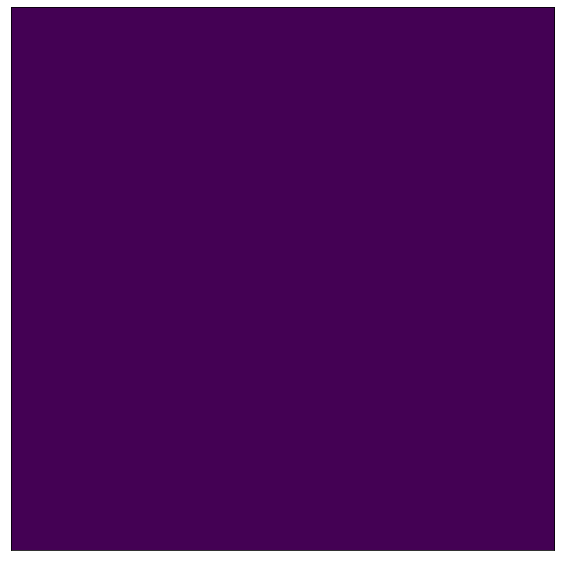

In [194]:
show_word_image_by_line(bad_contrast_df.iloc[0])


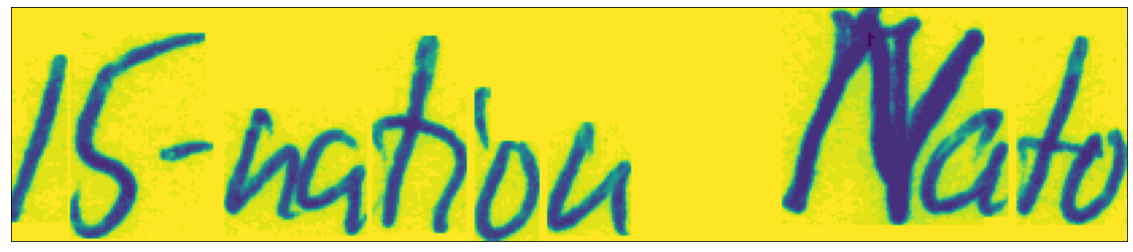

In [195]:
show_word_image_by_line(df[df['michelson_contrast'] == 1].iloc[0])

Nous remarquons des images inexploitables que nous pouvons retirer du dataset.

In [196]:
len(df)

115318

In [197]:
len(df[df['michelson_contrast'] > 0])

115186

In [198]:
df = df[df['michelson_contrast'] > 0]
df['michelson_contrast'].describe()

count    115186.000000
mean          0.700629
std           0.100006
min           0.085000
25%           0.650485
50%           0.717172
75%           0.764706
max           1.000000
Name: michelson_contrast, dtype: float64

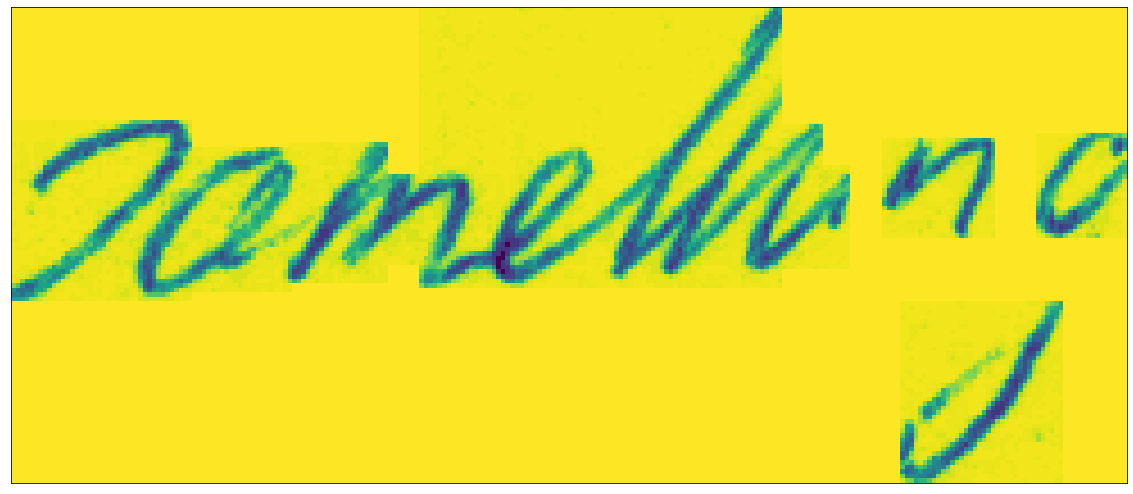

In [199]:
df[df['michelson_contrast'] == df['michelson_contrast'].min()]
show_word_image_by_line(df.iloc[47273])

L'image au contraste le plus petit reste lisible, nous pouvons ainsi considérer les autres images comme lisibles.

## Répartition des lettres dans le corpus

In [209]:

corpus = "".join([trans for trans in df['transcription']])

def get_letter_frequency_dict(text):
    dic = {}
    for l in text:
        if l in dic:
            dic[l] += 1
        else:
            dic[l] = 1
    return dic

freq_dict = get_letter_frequency_dict(corpus)
print(freq_dict)


{'A': 1257, 'M': 1144, 'O': 469, 'V': 171, 'E': 675, 't': 39964, 'o': 33336, 's': 27866, 'p': 8253, 'r': 27513, '.': 6179, 'G': 661, 'a': 35841, 'i': 30299, 'k': 2819, 'e': 56903, 'l': 18033, 'f': 10004, 'm': 10640, 'n': 31025, 'g': 8653, 'y': 8262, 'L': 638, 'b': 6800, 'u': 12202, 'P': 720, 'd': 17949, ' ': 49, 'w': 8807, 'c': 11823, 'h': 25242, 'F': 489, 'j': 423, 'W': 728, ',': 5614, 'x': 785, '0': 431, 'T': 1652, '-': 1545, "'": 1974, 'v': 4528, 'B': 854, 'H': 988, '"': 1596, 'S': 1064, '1': 493, '9': 179, '5': 157, '8': 118, '3': 174, '#': 79, 'q': 370, 'N': 711, 'R': 606, 'D': 569, 'K': 163, 'U': 189, 'I': 1598, '(': 202, '2': 209, ')': 199, 'C': 750, '4': 118, ':': 164, 'Y': 227, 'J': 181, '7': 64, ';': 204, '6': 121, 'z': 205, 'Z': 10, '?': 259, '*': 14, 'Q': 16, 'X': 8, '!': 225, '/': 16, '&': 55, '+': 9}


In [210]:
keys = list(freq_dict.keys())
values = list(freq_dict.values())
sorted_indexes = np.argsort(keys)
labels = []
counts = []
for index in sorted_indexes:
    labels.append(keys[index])
    counts.append(values[index])

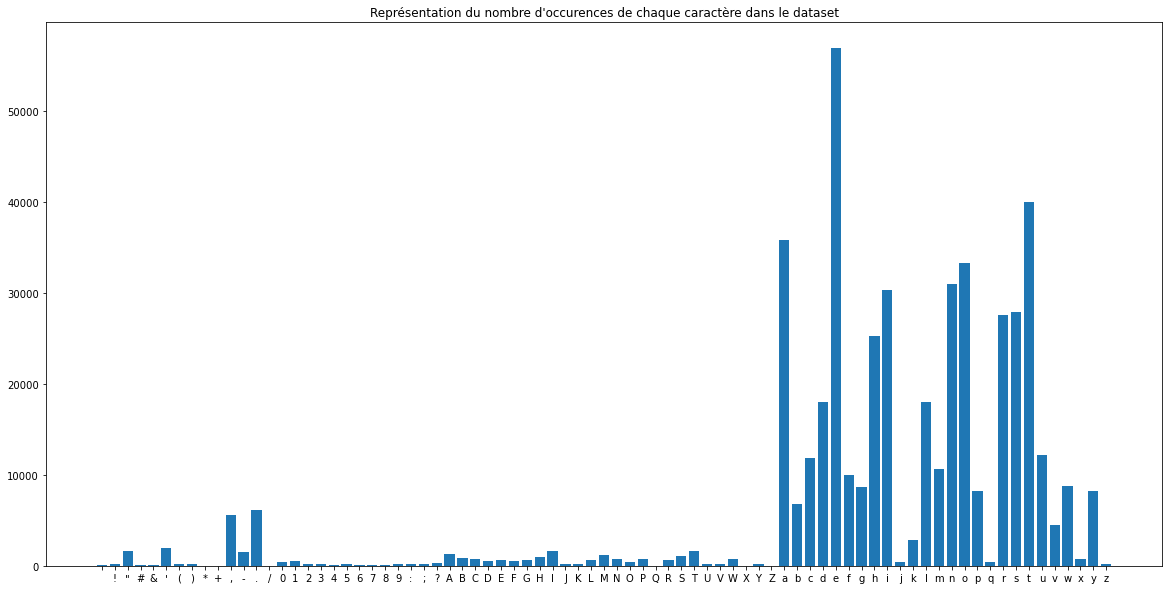

In [211]:
plt.figure(figsize=(20,10))
plt.title("Représentation du nombre d'occurences de chaque caractère dans le dataset")
plt.bar(labels, counts)
plt.show()

In [212]:
print("La lettre 'k' est représentée seulement", freq_dict['k'], "dans le corpus")
print("Tandis que la lettre 'e' est représentée", freq_dict['e'], "dans le corpus")

La lettre 'k' est représentée seulement 2819 dans le corpus
Tandis que la lettre 'e' est représentée 56903 dans le corpus


Nous pouvons observer une grosse disparité dans les représentations de chacune des lettres.
Les lettres 'j', 'k', 'q', 'x' et 'z' notamment sont très peu représentées. 

A l'inverse, les lettres 'e', 'a' et 't' sont très présentes. 



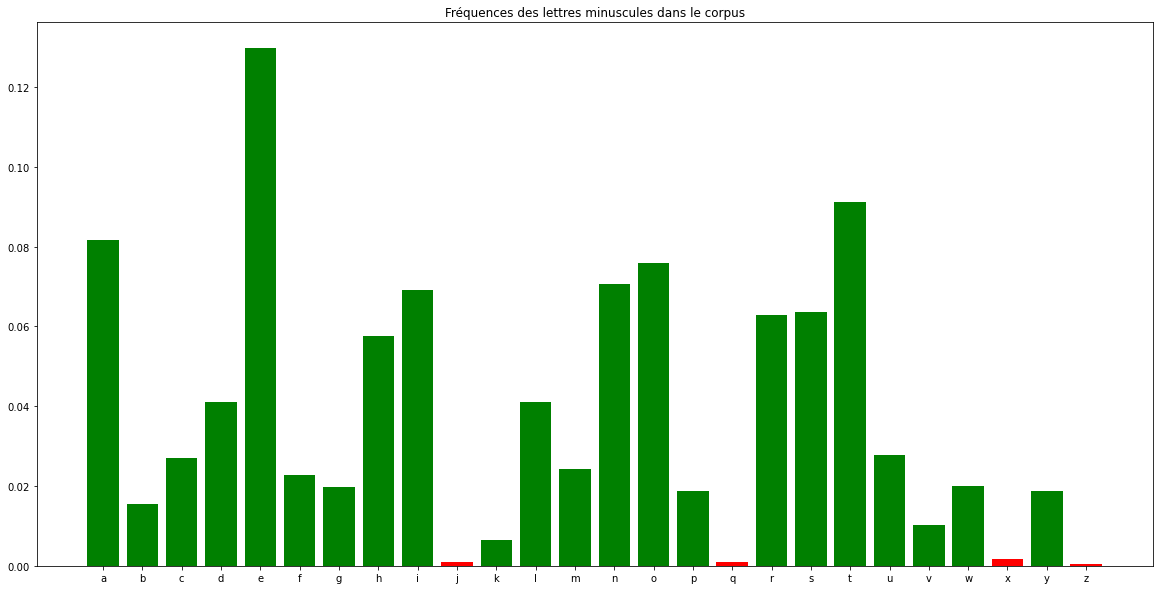

In [216]:
from functools import reduce

alphabet_start = labels.index('a')

alphabet_labels = labels[alphabet_start:]
alphabet_counts = counts[alphabet_start:]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)
colors = [('green' if p > 1000 else 'red') for p in alphabet_counts]

plt.figure(figsize=(20,10))
plt.title("Fréquences des lettres minuscules dans le corpus")
plt.bar(alphabet_labels, [count / total_alphabet_occurences for count in alphabet_counts], color=colors)
plt.show()

Cette distribution peut être mise en paralèlle avec la distribution des lettres dans la langue anglaise. 

En effet, notre objectif étant de créer une reconnaissance de caractères, plus notre modèle aura l'habtiude de traiter des lettres fréquentes correctement, meilleures seront nos chances de réussite, à defaut d'avoir un dataset plus conséquent.

Or, les fréquences des lettres anglaises semblent bien concordées avec la distribution de notre corpus. Le corpus est donc bien représentatif.

<img src="../imgs/english_letter_distribution.png" />

Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

On peut par contre se demander comment réagirait notre modèle à une autre langue dont la répartition des lettres serait différente.

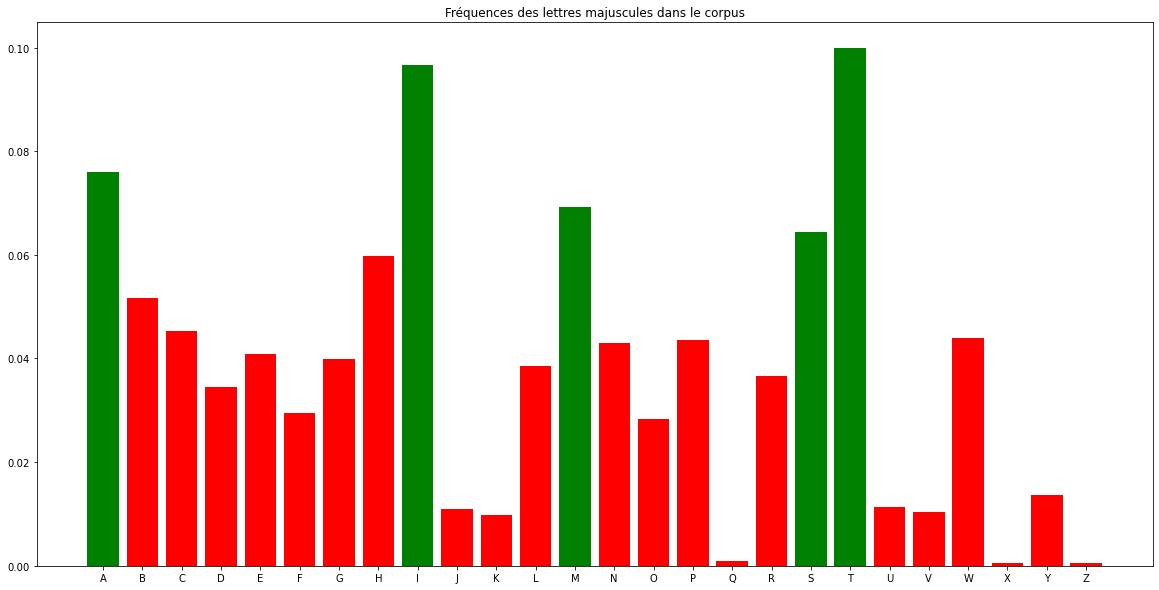

In [218]:
from functools import reduce

alphabet_start = labels.index('A')
alphabet_end = labels.index('Z')

alphabet_labels = labels[alphabet_start:alphabet_end++1]
alphabet_counts = counts[alphabet_start:alphabet_end+1]
total_alphabet_occurences = reduce(lambda a, b: a + b,  alphabet_counts)
colors = [('green' if p > 1000 else 'red') for p in alphabet_counts]

plt.figure(figsize=(20,10))
plt.title("Fréquences des lettres majuscules dans le corpus")
plt.bar(alphabet_labels, [count / total_alphabet_occurences for count in alphabet_counts], color=colors)
plt.show()

On remarque cependant une sous représentation des majuscules dans le dataset. Les représentations des majuscules étant radicalement différentes des minuscules, il se peut que notre modèle manque de données d'entraînement pour, par la suite, bien distinguer des majuscules.

## Position des boîtes

```
file n06-128.png
```

Output:
`n06-128.png: PNG image data, 2479 x 3542, 8-bit grayscale, non-interlaced`


In [208]:
df[(df['x'] == -1) | (df['y'] == -1) | (df['h'] == -1) | (df['w'] == -1)].head()

,word_id,seg_res,gray_level,x,y,w,h,tag,transcription,word_img_path,form_img_path,michelson_contrast


Il ne reste plus de mots dont le positionnement n'a pas été trouver. Nous pouvons donc analyser la répartition des boîtes dans notre dataset.

In [205]:
print(df['x'].max())
print(df['y'].max())

2471
2792


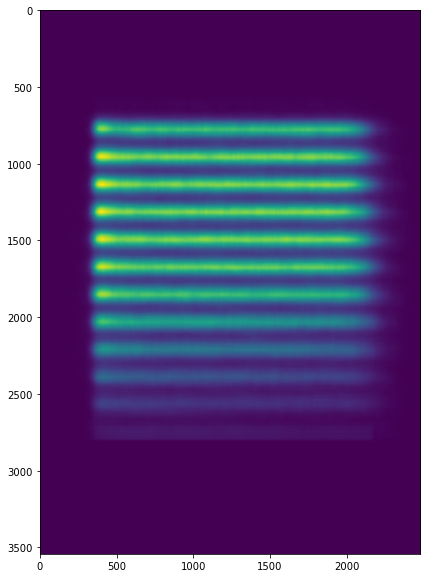

In [206]:
def show_text_position_over_dataset():
    arr = np.zeros((3542, 2479))
    for index, row in df.iterrows():
        x = row.x
        y = row.y
        arr[y][x] += 1
        for i in range(row.h):
            for j in range(row.w):
                arr[y + i][x + j] += 1

    plt.figure(figsize=(20,10))
    plt.imshow(arr);

# Need ten minutes to run
show_text_position_over_dataset()

<img src="../imgs/text_box_position.png">